In [114]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA

In [115]:
# input image dimensions
img_rows, img_cols = 931, 601
immatrix_right = []
listing_right = os.listdir("../dataset/OCT_ZEISS/right/") 
for file in listing_right:
    base_right = os.path.basename("../dataset/OCT_ZEISS/right/" + file)
    fileName_right = os.path.splitext(base_right)[0]    
    im_right = Image.open("../dataset/OCT_ZEISS/right/" + file) 
    gray_im_right = im_right.convert('L')
    img_right = gray_im_right.resize((img_rows,img_cols))
    immatrix_right.append(np.array(img_right))
img_array_right=np.array(immatrix_right)



In [116]:
img_array_right.shape

(52, 601, 931)

In [117]:
img_array_right = img_array_right.reshape((52,931*601))

In [118]:
pca = PCA(n_components=2)
pca.fit(img_array_right)
# 分析結果を元にデータセットを主成分に変換する
transformed_right = pca.fit_transform(img_array_right)

In [120]:
immatrix_left = []
listing_left = os.listdir("../dataset/OCT_ZEISS/left/") 
for file in listing_left:
    base_left = os.path.basename("../dataset/OCT_ZEISS/left/" + file)
    fileName_left = os.path.splitext(base_left)[0]
    im_left = Image.open("../dataset/OCT_ZEISS/left/" + file)
    gray_im_left = im_left.convert('L')
    img_left = gray_im_left.resize((img_rows,img_cols))
    immatrix_left.append(np.array(img_left))
img_array_left=np.array(immatrix_left)
    

In [121]:
img_array_left.shape
img_array_left = img_array_left.reshape((36,931*601))

In [122]:
pca = PCA(n_components=2)
pca.fit(img_array_left)
# 分析結果を元にデータセットを主成分に変換する
transformed_left = pca.fit_transform(img_array_left)

In [128]:
total=np.r_[transformed_left, transformed_right]

In [129]:
from sklearn.cluster import KMeans

In [144]:
def t(n):
    km = KMeans(n_clusters=2,init='random',n_init=1,max_iter=n,random_state=1)
    cluster = km.fit_predict(total)
    %matplotlib inline
    plt.scatter(total[:,0],total[:,1],c=cluster)
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    

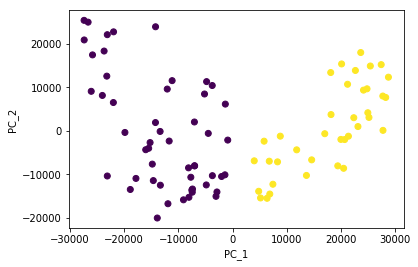

In [145]:
t(10)
